###**Classical Deep Learning Approach for Named Entity Recognition using CNN**




In [ ]:
# Importing useful libraries
import numpy as np # Importing numpy for numerical operations
import pandas as pd # Importing pandas for file operations

# Data reading to check the files format
train = open("/content/train.txt", "r")
print("Train File")
print(train.read(100))

print("Validation File")
valid = open("/content/valid.txt", "r")
print(train.read(100))


print("Trest File")
test = open("/content/test.txt", "r")
print(train.read(100))

Train File
-DOCSTART- -X- -X- O

EU NNP B-NP B-ORG
rejects VBZ B-VP O
German JJ B-NP B-MISC
call NN I-NP O
to T
Validation File
O B-VP O
boycott VB I-VP O
British JJ B-NP B-MISC
lamb NN I-NP O
. . O O

Peter NNP B-NP B-PER
Black
Trest File
burn NNP I-NP I-PER

BRUSSELS NNP B-NP B-LOC
1996-08-22 CD I-NP O

The DT B-NP O
European NNP I-NP B


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


469/469 ━━━━━━━━━━━━━━━━━━━━ 134s 261ms/step - accuracy: 0.9747 - loss: 0.2035 - val_accuracy: 0.9917 - val_loss: 0.0295
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 231ms/step - accuracy: 0.9960 - loss: 0.0150 - val_accuracy: 0.9950 - val_loss: 0.0184
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 217ms/step - accuracy: 0.9988 - loss: 0.0049 - val_accuracy: 0.9952 - val_loss: 0.0173
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 156s 247ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9951 - val_loss: 0.0185
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 129s 219ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9952 - val_loss: 0.0194
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step
              precision    recall  f1-score   support

       B-LOC       0.87      0.82      0.84      1668
       I-LOC       0.72      0.72      0.72       257
      B-MISC       0.81      0.74      0.77       702
      I-MISC       0.56      0.63      0.59       216
       B-PER       0.85      0.69      0.7

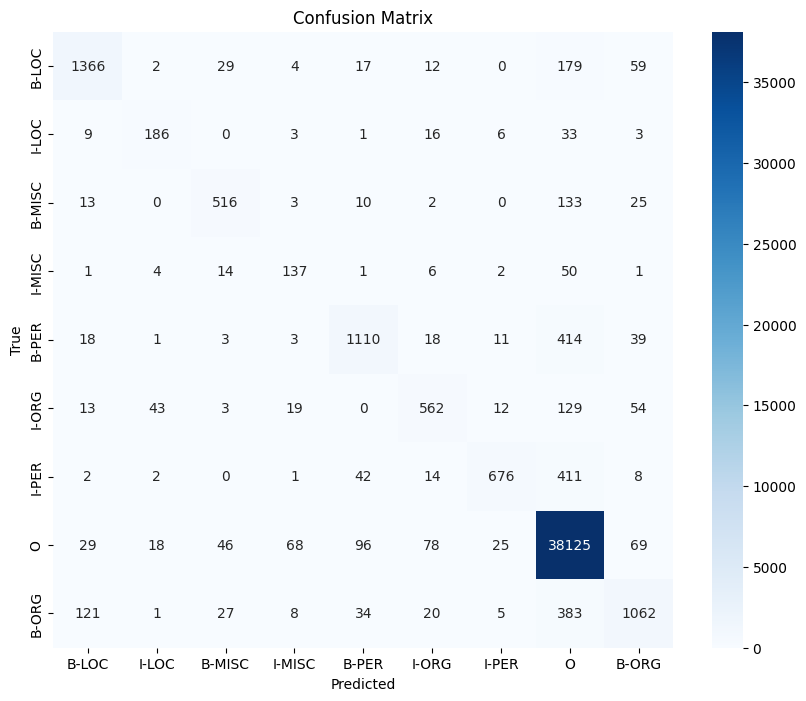

In [ ]:
import tensorflow as tf  # Importing TensorFlow for deep learning tasks
from tensorflow.keras import layers, models, preprocessing  # Importing specific modules from Keras
from sklearn.metrics import classification_report, confusion_matrix  # Importing metrics for evaluation
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import seaborn as sns  # Importing Seaborn for visualizations

# Load and preprocess data
def load_data(file_path):
    sentences, labels = [], []  # Initialize lists to store sentences and labels
    with open(file_path, 'r') as file:  # Open the file for reading
        sentence, label = [], []  # Initialize lists for the current sentence and label
        for line in file:  # Read the file line by line
            line = line.strip()  # Remove leading and trailing whitespace
            if not line:  # Check if the line is empty (indicating the end of a sentence)
                if sentence:  # If there is a sentence
                    sentences.append(sentence)  # Add the sentence to the list
                    labels.append(label)  # Add the labels to the list
                    sentence, label = [], []  # Reset sentence and label lists
                continue  # Skip to the next line
            parts = line.split()  # Split the line into parts
            sentence.append(parts[0])  # Add the word to the sentence
            label.append(parts[-1])  # Add the label to the label list
    return sentences, labels  # Return the sentences and labels

# Load data from files
train_sentences, train_labels = load_data('/content/train.txt')    #Training data
valid_sentences, valid_labels = load_data('/content/valid.txt')    #Validation data
test_sentences, test_labels = load_data('/content/test.txt')       #Test data

# Build vocabulary and tag index
word_vocab = {word for sentence in train_sentences + valid_sentences for word in sentence}  # Create a set of all words
word_vocab = {word: i + 2 for i, word in enumerate(word_vocab)}  # Map words to indices, starting from 2
word_vocab['PAD'] = 0  # Add padding token to vocabulary
word_vocab['UNK'] = 1  # Add unknown token to vocabulary

tag_vocab = {tag for label in train_labels + valid_labels for tag in label}  # Create a set of all tags
tag_vocab = {tag: i + 1 for i, tag in enumerate(tag_vocab)}  # Map tags to indices, starting from 1

# Encode sentences and labels
def encode_sentences(sentences, vocab):
    return [[vocab.get(word, vocab['UNK']) for word in sentence] for sentence in sentences]  # Convert words to indices

def encode_labels(labels, tag_vocab):
    return [[tag_vocab[tag] for tag in label] for label in labels]  # Convert tags to indices

# Encode the data
#converting sentences & labels into sequences of integers based on word_vocab & tag_vocab respectively

train_sequences = encode_sentences(train_sentences, word_vocab) # Convert training sentences into sequences of integers based on word_vocab
train_label_sequences = encode_labels(train_labels, tag_vocab)  # Convert training labels into sequences of integers based on tag_vocab
valid_sequences = encode_sentences(valid_sentences, word_vocab) # Convert validation sentences into sequences of integers based on word_vocab
valid_label_sequences = encode_labels(valid_labels, tag_vocab)  # Convert validation labels into sequences of integers based on tag_vocab
test_sequences = encode_sentences(test_sentences, word_vocab)  # Convert test sentences into sequences of integers based on word_vocab
test_label_sequences = encode_labels(test_labels, tag_vocab)  # Convert test labels into sequences of integers based on tag_vocab

# Padding sequences
max_len = max(map(len, train_sequences + valid_sequences + test_sequences))  # Find the maximum sequence length among all the encoded sequences

# Pad training sequences with 'PAD' token to ensure uniform length
train_sequences = preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_len, padding='post', value=word_vocab['PAD'])
# Pad training label sequences with 0 to ensure uniform length
train_label_sequences = preprocessing.sequence.pad_sequences(train_label_sequences, maxlen=max_len, padding='post', value=0)
 # Pad validation sequences with 'PAD' token to ensure uniform length
valid_sequences = preprocessing.sequence.pad_sequences(valid_sequences, maxlen=max_len, padding='post', value=word_vocab['PAD'])
# Pad validation label sequences with 0 to ensure uniform length
valid_label_sequences = preprocessing.sequence.pad_sequences(valid_label_sequences, maxlen=max_len, padding='post', value=0)
# Pad test sequences with 'PAD' token to ensure uniform length
test_sequences = preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len, padding='post', value=word_vocab['PAD'])
# Pad test label sequences with 0 to ensure uniform length
test_label_sequences = preprocessing.sequence.pad_sequences(test_label_sequences, maxlen=max_len, padding='post', value=0)


# Model definition
model = models.Sequential([
    layers.Embedding(input_dim=len(word_vocab), output_dim=64, input_length=max_len),  # Embedding layer
    layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'),  # Convolutional layer
    layers.TimeDistributed(layers.Dense(len(tag_vocab) + 1, activation='softmax'))  # Dense layer applied to each time step
])

from tensorflow.keras.optimizers import Adam  # Import Adam optimizer
optimizer = Adam(learning_rate=0.001)  # Create Adam optimizer with specified learning rate

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model

# Expand dimensions for labels
train_label_sequences = np.expand_dims(train_label_sequences, -1)  # Add an extra dimension for labels
valid_label_sequences = np.expand_dims(valid_label_sequences, -1)  # Add an extra dimension for labels

# Model training
model.fit(train_sequences, train_label_sequences, batch_size=32, epochs=5, validation_data=(valid_sequences, valid_label_sequences))  # Train the model

# Predictions
predictions = model.predict(test_sequences)  # Predict labels for test data
predicted_labels = np.argmax(predictions, axis=-1)  # Convert predicted probabilities to class labels

# Flatten sequences for evaluation and filter out padding
true_labels_flat = [tag for seq, sent in zip(test_label_sequences, test_sequences) for tag, word in zip(seq, sent) if word != word_vocab['PAD']]
pred_labels_flat = [tag for seq, sent in zip(predicted_labels, test_sequences) for tag, word in zip(seq, sent) if word != word_vocab['PAD']]

# Confusion matrix and classification report
labels = list(tag_vocab.keys())  # Get the list of labels
print(classification_report(true_labels_flat, pred_labels_flat, target_names=labels, zero_division=0))  # Print classification report

conf_matrix = confusion_matrix(true_labels_flat, pred_labels_flat, labels=list(range(1, len(tag_vocab) + 1)))  # Compute confusion matrix
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)  # Plot heatmap
plt.xlabel('Predicted')  # Set x-axis label
plt.ylabel('True')  # Set y-axis label
plt.title('Confusion Matrix')  # Set title
plt.show()  # Display the plot


###**Above CNN Model with Modifications for better accuracy**
OPtimitzed learning rate and Dropout to avoid overfitting

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.9612 - loss: 0.2269 - val_accuracy: 0.1224 - val_loss: 3.9324
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9974 - loss: 0.0098 - val_accuracy: 0.9956 - val_loss: 0.0181
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9957 - val_loss: 0.0203
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9958 - val_loss: 0.0221
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9958 - val_loss: 0.0229
116/116 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step


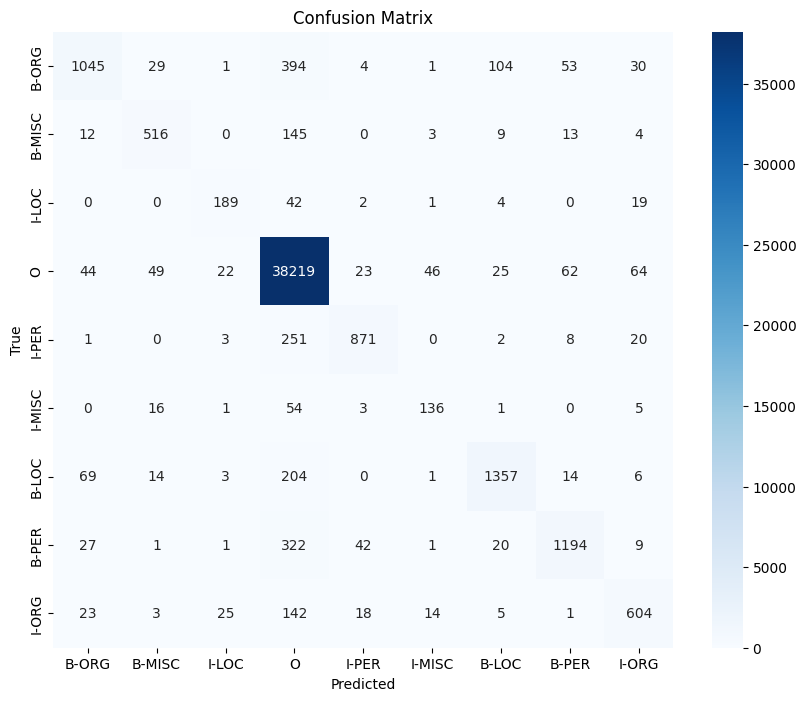

              precision    recall  f1-score   support

       B-ORG       0.86      0.63      0.73      1661
      B-MISC       0.82      0.74      0.78       702
       I-LOC       0.77      0.74      0.75       257
           O       0.96      0.99      0.98     38554
       I-PER       0.90      0.75      0.82      1156
      I-MISC       0.67      0.63      0.65       216
       B-LOC       0.89      0.81      0.85      1668
       B-PER       0.89      0.74      0.81      1617
       I-ORG       0.79      0.72      0.76       835

    accuracy                           0.95     46666
   macro avg       0.84      0.75      0.79     46666
weighted avg       0.94      0.95      0.94     46666



In [ ]:
import numpy as np  # Import NumPy for numerical operations
import tensorflow as tf  # Import TensorFlow for building and training deep learning models
from tensorflow.keras import layers, models, preprocessing  # Import necessary Keras modules
from sklearn.metrics import classification_report, confusion_matrix  # Import metrics for evaluation
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for enhanced plotting

# Load and preprocess data
def load_data(file_path):
    sentences, labels = [], []  # Initialize lists to hold sentences and labels
    with open(file_path, 'r') as file:  # Open the file for reading
        sentence, label = [], []  # Temporary lists to build sentences and labels
        for line in file:  # Iterate through each line in the file
            line = line.strip()  # Remove leading/trailing whitespace
            if not line:  # If the line is empty, it indicates the end of a sentence
                if sentence:  # If there is a sentence accumulated
                    sentences.append(sentence)  # Append the sentence to the list
                    labels.append(label)  # Append the corresponding labels to the list
                    sentence, label = [], []  # Reset for the next sentence
                continue
            parts = line.split()  # Split the line into parts
            sentence.append(parts[0])  # Append the word to the sentence list
            label.append(parts[-1])  # Append the label to the label list
    return sentences, labels  # Return the lists of sentences and labels

# Load datasets
train_sentences, train_labels = load_data('/content/train.txt')  # Load training data
valid_sentences, valid_labels = load_data('/content/valid.txt')  # Load validation data
test_sentences, test_labels = load_data('/content/test.txt')  # Load test data

# Build vocabulary and tag index
word_vocab = {word for sentence in train_sentences + valid_sentences for word in sentence}  # Create a set of unique words
word_vocab = {word: i + 2 for i, word in enumerate(word_vocab)}  # Map each word to a unique index, starting from 2
word_vocab['PAD'] = 0  # Add a padding token with index 0
word_vocab['UNK'] = 1  # Add an unknown token with index 1

tag_vocab = {tag for label in train_labels + valid_labels for tag in label}  # Create a set of unique tags
tag_vocab = {tag: i + 1 for i, tag in enumerate(tag_vocab)}  # Map each tag to a unique index, starting from 1

# Encode sentences and labels
def encode_sentences(sentences, vocab):
    return [[vocab.get(word, vocab['UNK']) for word in sentence] for sentence in sentences]  # Convert words to their indices

def encode_labels(labels, tag_vocab):
    return [[tag_vocab[tag] for tag in label] for label in labels]  # Convert tags to their indices

# Encode and pad sequences
train_sequences = encode_sentences(train_sentences, word_vocab)  # Encode training sentences
train_label_sequences = encode_labels(train_labels, tag_vocab)  # Encode training labels
valid_sequences = encode_sentences(valid_sentences, word_vocab)  # Encode validation sentences
valid_label_sequences = encode_labels(valid_labels, tag_vocab)  # Encode validation labels
test_sequences = encode_sentences(test_sentences, word_vocab)  # Encode test sentences
test_label_sequences = encode_labels(test_labels, tag_vocab)  # Encode test labels

# Padding sequences to the same length
max_len = max(map(len, train_sequences + valid_sequences + test_sequences))  # Determine the maximum sequence length
train_sequences = preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_len, padding='post', value=word_vocab['PAD'])  # Pad training sequences
train_label_sequences = preprocessing.sequence.pad_sequences(train_label_sequences, maxlen=max_len, padding='post', value=0)  # Pad training labels
valid_sequences = preprocessing.sequence.pad_sequences(valid_sequences, maxlen=max_len, padding='post', value=word_vocab['PAD'])  # Pad validation sequences
valid_label_sequences = preprocessing.sequence.pad_sequences(valid_label_sequences, maxlen=max_len, padding='post', value=0)  # Pad validation labels
test_sequences = preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len, padding='post', value=word_vocab['PAD'])  # Pad test sequences
test_label_sequences = preprocessing.sequence.pad_sequences(test_label_sequences, maxlen=max_len, padding='post', value=0)  # Pad test labels

# Model definition
model = models.Sequential([
    layers.Embedding(input_dim=len(word_vocab), output_dim=128, input_length=max_len),  # Embedding layer for words
    layers.Conv1D(filters=512, kernel_size=3, padding='same', activation='relu'),  # First convolutional layer
    layers.BatchNormalization(),  # Batch normalization for stabilizing training
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'),  # Second convolutional layer
    layers.BatchNormalization(),  # Batch normalization for the second convolutional layer
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.TimeDistributed(layers.Dense(len(tag_vocab) + 1, activation='softmax'))  # Output layer for predicting tags with softmax activation
])

from tensorflow.keras.optimizers import Adam  # Import Adam optimizer
optimizer = Adam(learning_rate=0.001)  # Initialize Adam optimizer with a learning rate of 0.001

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model with sparse categorical crossentropy loss and accuracy metric

# Expand dimensions for labels
train_label_sequences = np.expand_dims(train_label_sequences, -1)  # Expand dimensions for training labels
valid_label_sequences = np.expand_dims(valid_label_sequences, -1)  # Expand dimensions for validation labels

# Model training
model.fit(train_sequences, train_label_sequences, batch_size=32, epochs=5, validation_data=(valid_sequences, valid_label_sequences))  # Train the model

# Predictions
predictions = model.predict(test_sequences)  # Predict labels for test sequences
predicted_labels = np.argmax(predictions, axis=-1)  # Get the predicted labels with the highest probability

# Flatten sequences for evaluation and filter out padding
true_labels_flat = [tag for seq, sent in zip(test_label_sequences, test_sequences) for tag, word in zip(seq, sent) if word != word_vocab['PAD']]  # Flatten true labels and exclude PAD
pred_labels_flat = [tag for seq, sent in zip(predicted_labels, test_sequences) for tag, word in zip(seq, sent) if word != word_vocab['PAD']]  # Flatten predicted labels and exclude PAD

# Confusion matrix and classification report
labels = list(tag_vocab.keys())  # Get the list of labels
conf_matrix = confusion_matrix(true_labels_flat, pred_labels_flat, labels=list(tag_vocab.values()))  # Compute confusion matrix
plt.figure(figsize=(10, 8))  # Set figure size for the plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)  # Plot confusion matrix using Seaborn
plt.xlabel('Predicted')  # Label x-axis
plt.ylabel('True')  # Label y-axis
plt.title('Confusion Matrix')  # Title for the plot
plt.show()  # Display the plot

# Ensure the labels used in classification report match the unique labels in predictions and true labels
print(classification_report(true_labels_flat, pred_labels_flat, target_names=labels, zero_division=0))  # Print classification report
